In [ ]:
# UANL
# Facultad de Ciencias Fisico Matemáticas
# Aprendizaje Automático
# Mayo Agosto 2024
# Francisco David Treviño Bautista

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, classification_report, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import randint, uniform
import warnings

C:\Users\franc\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\franc\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
warnings.filterwarnings('ignore')

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_ids = train_df['id']
test_ids = test_df['id']
train_df = train_df.drop(columns=['id'])
test_df = test_df.drop(columns=['id'])

In [3]:
print(train_df.head())

   title_word_count  document_entropy  freshness   easiness  \
0                 9          7.753995      16310  75.583936   
1                 6          8.305269      15410  86.870523   
2                 3          7.965583      15680  81.915968   
3                 9          8.142877      15610  80.148937   
4                 9          8.161250      14920  76.907549   

   fraction_stopword_presence  normalization_rate  speaker_speed  \
0                    0.553664            0.034049       2.997753   
1                    0.584498            0.018763       2.635789   
2                    0.605685            0.030720       2.538095   
3                    0.593664            0.016873       2.259055   
4                    0.581637            0.023412       2.420000   

   silent_period_rate  engagement  
0                 0.0        True  
1                 0.0       False  
2                 0.0       False  
3                 0.0       False  
4                 0.0       Fals

In [4]:
print(train_df.describe())

       title_word_count  document_entropy     freshness     easiness  \
count       9239.000000       9239.000000   9239.000000  9239.000000   
mean           7.701050          7.792685  14808.587509    84.756029   
std            3.785066          0.697710   1208.953646     8.303489   
min            1.000000          0.000000  10830.000000    28.210966   
25%            5.000000          7.594235  14070.000000    80.415060   
50%            7.000000          7.875103  14750.000000    84.482122   
75%           10.000000          8.164166  15600.000000    88.388711   
max           33.000000          9.278573  17430.000000   122.032000   

       fraction_stopword_presence  normalization_rate  speaker_speed  \
count                 9239.000000         9239.000000    9239.000000   
mean                     0.612214            0.021354       2.413320   
std                      0.051872            0.009545       1.588296   
min                      0.000000            0.000000       0.0

In [5]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9239 entries, 0 to 9238
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title_word_count            9239 non-null   int64  
 1   document_entropy            9239 non-null   float64
 2   freshness                   9239 non-null   int64  
 3   easiness                    9239 non-null   float64
 4   fraction_stopword_presence  9239 non-null   float64
 5   normalization_rate          9239 non-null   float64
 6   speaker_speed               9239 non-null   float64
 7   silent_period_rate          9239 non-null   float64
 8   engagement                  9239 non-null   bool   
dtypes: bool(1), float64(6), int64(2)
memory usage: 586.6 KB
None


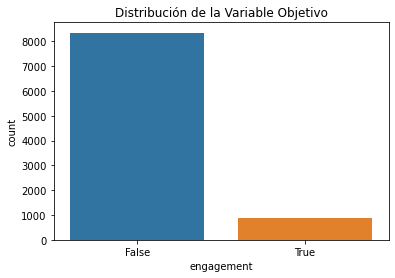

In [6]:
sns.countplot(x='engagement', data=train_df)
plt.title('Distribución de la Variable Objetivo')
plt.show()

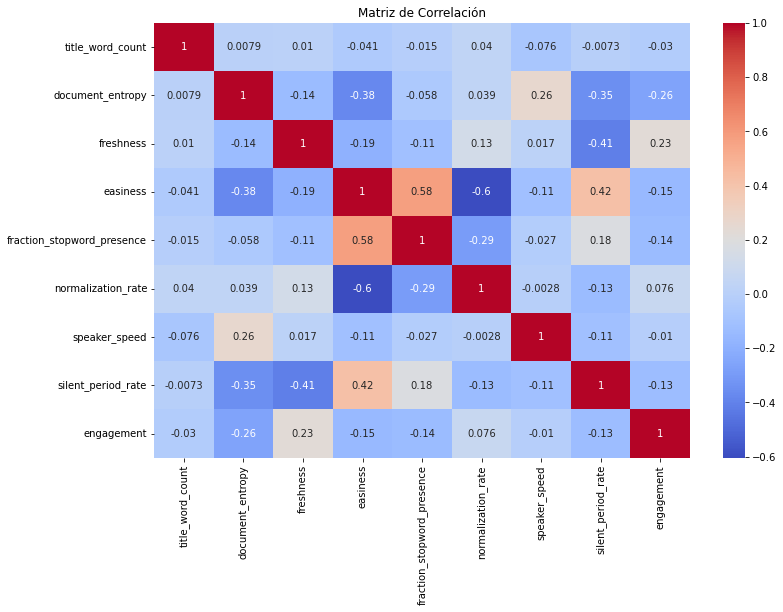

In [7]:
correlation_matrix = train_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

X = train_df.drop(columns=['engagement'])
y = train_df['engagement']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
models = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(max_iter=5000, random_state=44))
    ]),
    'Support Vector Machine': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', SVC(probability=True, random_state=22))
    ]),
    'K-Nearest Neighbors': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier())
    ]),
    'Decision Tree': DecisionTreeClassifier(random_state=11),
    'Random Forest': RandomForestClassifier(random_state=33),
    'Gradient Boosting': GradientBoostingClassifier(random_state=55),
    'Neural Network': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', MLPClassifier(max_iter=5000, random_state=66))
    ]),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=77)
}

param_grids = {
    'Logistic Regression': {
        'classifier__C': uniform(0.01, 100),
        'classifier__solver': ['liblinear', 'saga']
    },
    'Support Vector Machine': {
        'classifier__C': uniform(0.1, 100),
        'classifier__gamma': uniform(0.001, 1),
        'classifier__kernel': ['linear', 'rbf']
    },
    'K-Nearest Neighbors': {
        'classifier__n_neighbors': randint(3, 20),
        'classifier__weights': ['uniform', 'distance']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': randint(2, 20),
        'min_samples_leaf': randint(1, 10)
    },
    'Random Forest': {
        'n_estimators': randint(50, 200),
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': randint(2, 20)
    },
    'Gradient Boosting': {
        'n_estimators': randint(50, 200),
        'learning_rate': uniform(0.01, 0.2),
        'max_depth': randint(3, 10)
    },
    'Neural Network': {
        'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
        'classifier__activation': ['tanh', 'relu'],
        'classifier__solver': ['sgd', 'adam'],
        'classifier__alpha': uniform(0.0001, 0.1),
        'classifier__learning_rate': ['constant', 'adaptive']
    },
    'XGBoost': {
        'n_estimators': randint(50, 200),
        'learning_rate': uniform(0.01, 0.3),
        'max_depth': randint(3, 10),
        'colsample_bytree': uniform(0.3, 0.7),
        'subsample': uniform(0.5, 0.5)
    }
}

In [10]:
results = {}
model_metrics = []
best_params_dict = {}
roc_curves = {}

for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    results[model_name] = cv_scores.mean()
    print(f"{model_name}: ROC AUC = {cv_scores.mean()}")

    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    y_val_proba = model.predict_proba(X_val)[:, 1]

    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    roc_auc = roc_auc_score(y_val, y_val_proba)
    report = classification_report(y_val, y_val_pred, output_dict=True)

    model_metrics.append({
        'Model': model_name,
        'Cross-Validation ROC AUC': cv_scores.mean(),
        'Validation Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Validation ROC AUC': roc_auc,
        'Support': report['macro avg']['support']
    })

    if hasattr(model, 'best_params_'):
        best_params_dict[model_name] = model.best_params_
    else:
        best_params_dict[model_name] = model.get_params()

    fpr, tpr, _ = roc_curve(y_val, y_val_proba)
    roc_curves[model_name] = (fpr, tpr, roc_auc)

Logistic Regression: ROC AUC = 0.8445586686998763
Support Vector Machine: ROC AUC = 0.8375924027130541
K-Nearest Neighbors: ROC AUC = 0.8033353384740634
Decision Tree: ROC AUC = 0.6895794374648023
Random Forest: ROC AUC = 0.8847284915205942
Gradient Boosting: ROC AUC = 0.8832802288263546
Neural Network: ROC AUC = 0.8840655327526801
XGBoost: ROC AUC = 0.8826059466215698


In [11]:
metrics_df = pd.DataFrame(model_metrics)
print(metrics_df)

                    Model  Cross-Validation ROC AUC  Validation Accuracy  \
0     Logistic Regression                  0.844559             0.919913   
1  Support Vector Machine                  0.837592             0.936688   
2     K-Nearest Neighbors                  0.803335             0.928030   
3           Decision Tree                  0.689579             0.900433   
4           Random Forest                  0.884728             0.933442   
5       Gradient Boosting                  0.883280             0.935606   
6          Neural Network                  0.884066             0.934524   
7                 XGBoost                  0.882606             0.929113   

   Precision    Recall  F1-Score  Validation ROC AUC  Support  
0   0.604938  0.296970  0.398374            0.861395   1848.0  
1   0.772727  0.412121  0.537549            0.854394   1848.0  
2   0.660000  0.400000  0.498113            0.809962   1848.0  
3   0.449735  0.515152  0.480226            0.726679   1848

In [12]:
print("\nMejores Parámetros Para Cada Modelo:")
for model_name, params in best_params_dict.items():
    print(f"{model_name}: {params}")


Mejores Parámetros Para Cada Modelo:
Logistic Regression: {'memory': None, 'steps': [('scaler', StandardScaler()), ('classifier', LogisticRegression(max_iter=5000, random_state=44))], 'verbose': False, 'scaler': StandardScaler(), 'classifier': LogisticRegression(max_iter=5000, random_state=44), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'classifier__C': 1.0, 'classifier__class_weight': None, 'classifier__dual': False, 'classifier__fit_intercept': True, 'classifier__intercept_scaling': 1, 'classifier__l1_ratio': None, 'classifier__max_iter': 5000, 'classifier__multi_class': 'deprecated', 'classifier__n_jobs': None, 'classifier__penalty': 'l2', 'classifier__random_state': 44, 'classifier__solver': 'lbfgs', 'classifier__tol': 0.0001, 'classifier__verbose': 0, 'classifier__warm_start': False}
Support Vector Machine: {'memory': None, 'steps': [('scaler', StandardScaler()), ('classifier', SVC(probability=True, random_state=22))], 'verbose': False, 'scaler': S

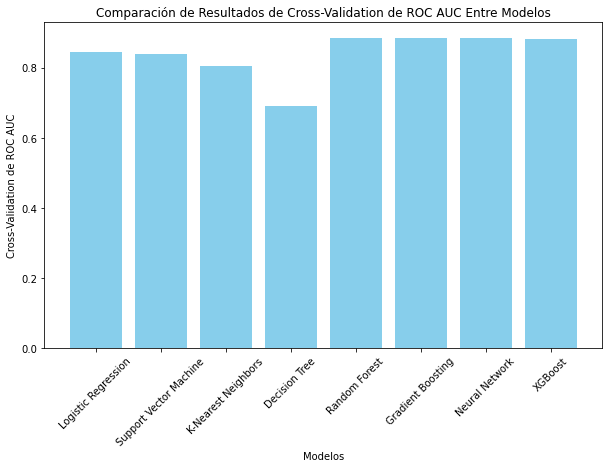

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.xlabel('Modelos')
plt.ylabel('Cross-Validation de ROC AUC')
plt.title('Comparación de Resultados de Cross-Validation de ROC AUC Entre Modelos')
plt.xticks(rotation=45)
plt.show()

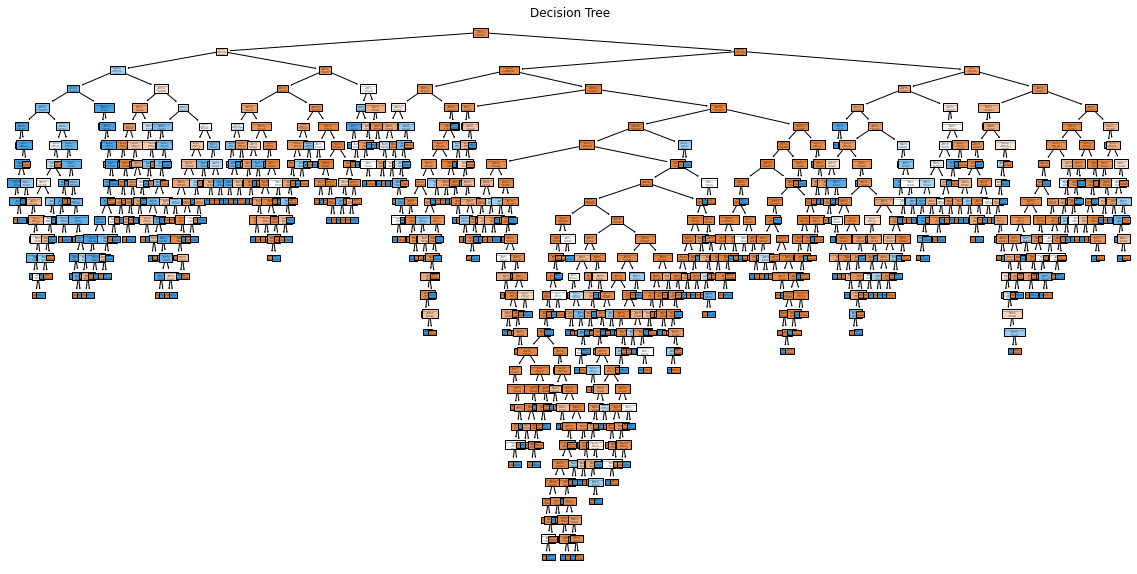

In [14]:
decision_tree_model = models['Decision Tree']
decision_tree_model.fit(X_train, y_train)
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_model, filled=True, feature_names=X.columns, class_names=['False', 'True'])
plt.title('Decision Tree')
plt.show()

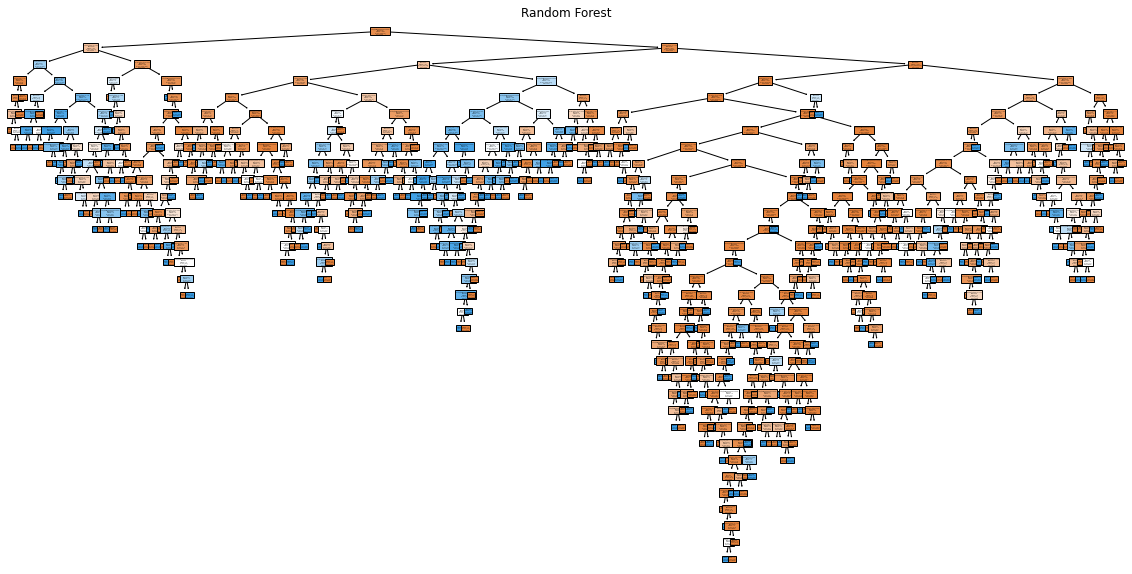

In [15]:
random_forest_model = models['Random Forest']
random_forest_model.fit(X_train, y_train)
plt.figure(figsize=(20, 10))
plot_tree(random_forest_model.estimators_[0], filled=True, feature_names=X.columns, class_names=['False', 'True'])
plt.title('Random Forest')
plt.show()

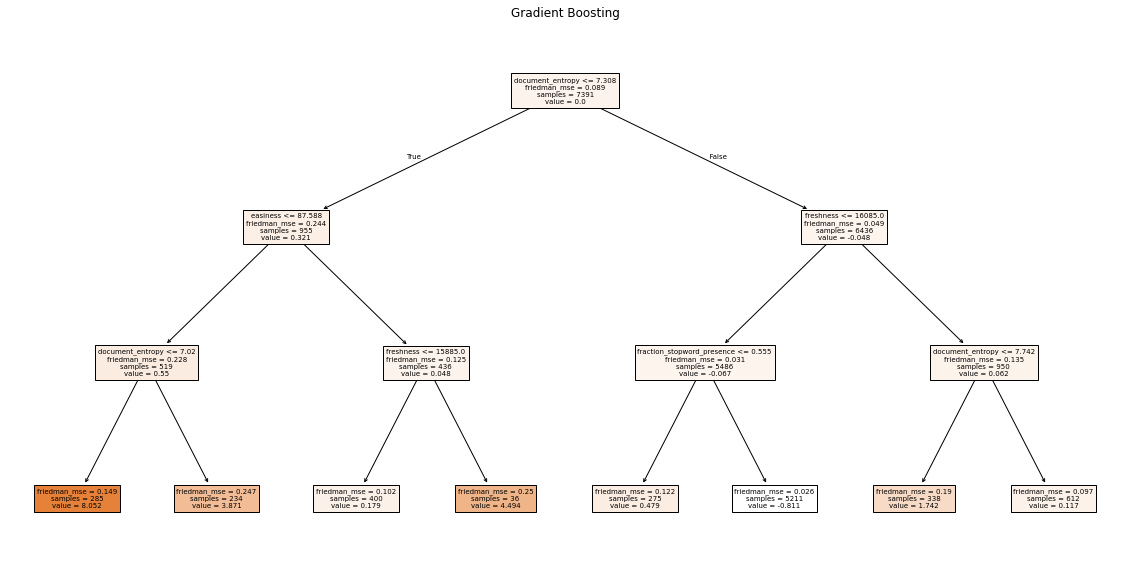

In [16]:
gradient_boosting_model = models['Gradient Boosting']
gradient_boosting_model.fit(X_train, y_train)
plt.figure(figsize=(20, 10))
plot_tree(gradient_boosting_model.estimators_[0, 0], filled=True, feature_names=X.columns, class_names=['False', 'True'])
plt.title('Gradient Boosting')
plt.show()

In [17]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

param_grid = param_grids[best_model_name]
random_search = RandomizedSearchCV(best_model, param_distributions=param_grid, n_iter=50, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

print(f"Mejores parámetros para {best_model_name} después de RandomizedSearchCV: {random_search.best_params_}")

Mejores parámetros para Random Forest después de RandomizedSearchCV: {'max_depth': 30, 'min_samples_split': 9, 'n_estimators': 84}


In [18]:
best_params = random_search.best_params_
if best_model_name in ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbors', 'Neural Network']:
    param_grid = {k: [v] for k, v in best_params.items()}
elif best_model_name == 'Decision Tree':
    param_grid = {
        'max_depth': [best_params['max_depth']] if best_params['max_depth'] is not None else [None],
        'min_samples_split': [best_params['min_samples_split'] - 1, best_params['min_samples_split'], best_params['min_samples_split'] + 1],
        'min_samples_leaf': [best_params['min_samples_leaf'] - 1, best_params['min_samples_leaf'], best_params['min_samples_leaf'] + 1]
    }
elif best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [best_params['n_estimators'] - 50, best_params['n_estimators'], best_params['n_estimators'] + 50],
        'max_depth': [best_params['max_depth']] if best_params['max_depth'] is not None else [None],
        'min_samples_split': [best_params['min_samples_split'] - 1, best_params['min_samples_split'], best_params['min_samples_split'] + 1]
    }
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [best_params['n_estimators'] - 50, best_params['n_estimators'], best_params['n_estimators'] + 50],
        'learning_rate': [best_params['learning_rate'] / 2, best_params['learning_rate'], best_params['learning_rate'] * 2],
        'max_depth': [best_params['max_depth'] - 1, best_params['max_depth'], best_params['max_depth'] + 1]
    }
elif best_model_name == 'XGBoost':
    param_grid = {
        'n_estimators': [best_params['n_estimators'] - 50, best_params['n_estimators'], best_params['n_estimators'] + 50],
        'learning_rate': [best_params['learning_rate'] / 2, best_params['learning_rate'], best_params['learning_rate'] * 2],
        'max_depth': [best_params['max_depth'] - 1, best_params['max_depth'], best_params['max_depth'] + 1],
        'colsample_bytree': [best_params['colsample_bytree']],
        'subsample': [best_params['subsample']]
    }

In [19]:
grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Mejores parámetros para {best_model_name} después de GridSearchCV: {grid_search.best_params_}")


Mejores parámetros para Random Forest después de GridSearchCV: {'max_depth': 30, 'min_samples_split': 9, 'n_estimators': 134}


In [20]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_roc_auc = roc_auc_score(y_val, best_model.predict_proba(X_val)[:, 1])

print(f"Validation Accuracy: {val_accuracy}")
print(f"Validation ROC AUC: {val_roc_auc}")

Validation Accuracy: 0.9361471861471862
Validation ROC AUC: 0.8977205207151732


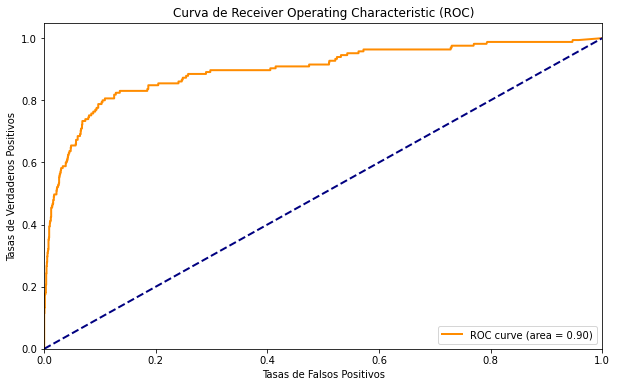

In [21]:
y_val_proba = best_model.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_val_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasas de Falsos Positivos')
plt.ylabel('Tasas de Verdaderos Positivos')
plt.title('Curva de Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [22]:
test_pred = best_model.predict(test_df)
resultados = pd.DataFrame({'id': test_ids, 'engagement': test_pred})
resultados.to_csv('resultados.csv', index=False)

In [23]:
print("Resultados de Evaluación:")
print(resultados.head())
params_df = pd.DataFrame(best_params_dict).T
params_df.index.name = 'Model'
params_df.reset_index(inplace=True)
final_metrics_df = metrics_df.merge(params_df, on='Model')
print("\nTabla Comparativa de Resultados:")
print(final_metrics_df)

Resultados de Evaluación:
     id  engagement
0  9240       False
1  9241       False
2  9242       False
3  9243        True
4  9244       False

Tabla Comparativa de Resultados:
                    Model  Cross-Validation ROC AUC  Validation Accuracy  \
0     Logistic Regression                  0.844559             0.919913   
1  Support Vector Machine                  0.837592             0.936688   
2     K-Nearest Neighbors                  0.803335             0.928030   
3           Decision Tree                  0.689579             0.900433   
4           Random Forest                  0.884728             0.933442   
5       Gradient Boosting                  0.883280             0.935606   
6          Neural Network                  0.884066             0.934524   
7                 XGBoost                  0.882606             0.929113   

   Precision    Recall  F1-Score  Validation ROC AUC  Support memory  \
0   0.604938  0.296970  0.398374            0.861395   1848.0  

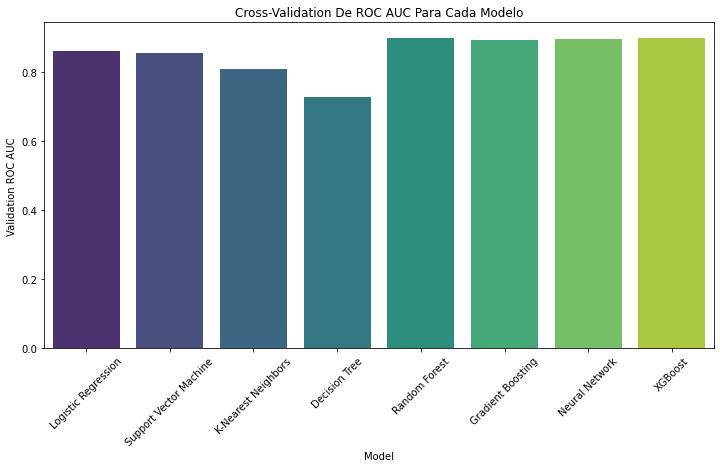

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Validation ROC AUC', data=final_metrics_df, palette='viridis')
plt.title('Cross-Validation De ROC AUC Para Cada Modelo')
plt.xticks(rotation=45)
plt.show()

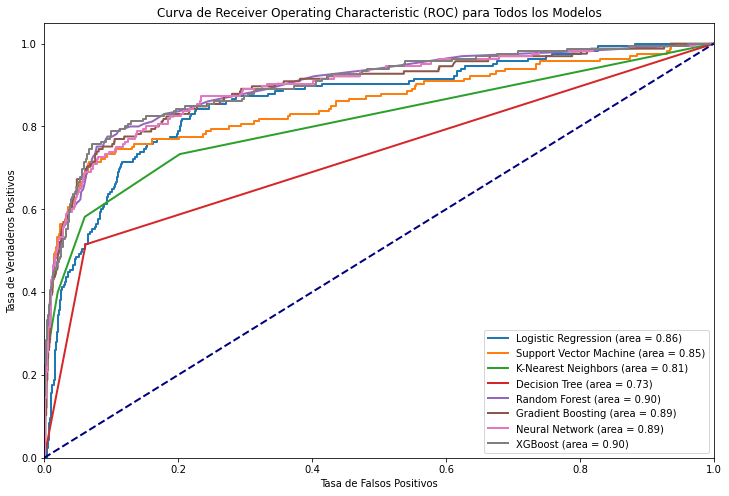

In [25]:
plt.figure(figsize=(12, 8))
for model_name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva de Receiver Operating Characteristic (ROC) para Todos los Modelos')
plt.legend(loc="lower right")
plt.show()